### 1.Import numpy and pandas and load data file named 'test_Y3wMUE5_7gLdaTN.csv' as test



In [55]:
import numpy as np
import pandas as pd
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

### 2.Print list of column names


In [56]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### 3.Types of data columns


In [57]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### 4.Summary statistics


In [58]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### DATA CLEANING AND PREPROCESSING

In [59]:
test.ApplicantIncome.value_counts()

3500     6
5000     6
3333     5
7500     4
4333     4
        ..
2366     1
2083     1
13633    1
3909     1
2875     1
Name: ApplicantIncome, Length: 314, dtype: int64

In [60]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

### 5.Find missing values

In [61]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [63]:
test.shape

(367, 12)

### 6.Impute missing values with mean (numerical variables)


In [64]:
test1= test.drop(['Credit_History'], axis=1)
test1.fillna(test1.mean(), inplace=True)
test.iloc[:, :10] = test1.iloc[:,:]

In [65]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

### 7.Impute missing values with mode (categorical variables)


In [66]:
test.Gender.fillna(test.Gender.mode()[0], inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0], inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0], inplace=True)

In [67]:
test.fillna(0, inplace=True)

In [68]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [69]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [70]:
### 8.Remove irrelevant columns Loan_ID variable - Irrelevant from test and train data

In [71]:
test.drop('Loan_ID', axis=1, inplace=True)

### 9.Build dummy variables for categorical variables



In [72]:
test=pd.get_dummies(test, drop_first=True)

### 10.Get x as columns of ApplicantIncome and Credit_History


In [73]:
x = test[['ApplicantIncome', 'Credit_History']].values

### 11.Import matplotlib


In [74]:
import matplotlib.pyplot as plt

### 12.Elbow method to determine K


In [75]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=8)
    kmeans.fit(test)
    wcss.append(kmeans.inertia_)

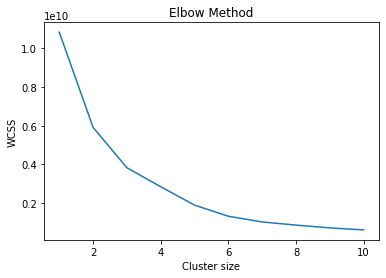

In [76]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster size')
plt.ylabel('WCSS')
plt.show()

### 13.fit K_means with founded K



In [77]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=8)
y_kmeans=kmeans.fit_predict(x)


### 14.show cluster results


In [78]:
y_kmeans

array([4, 0, 4, 0, 0, 0, 0, 4, 3, 0, 0, 0, 4, 3, 4, 4, 4, 4, 2, 0, 0, 0,
       4, 4, 4, 0, 4, 2, 4, 0, 0, 4, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 0, 2,
       4, 4, 4, 0, 2, 2, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 2, 4, 0, 4, 0,
       4, 0, 2, 0, 0, 4, 4, 4, 4, 0, 0, 4, 0, 2, 4, 1, 4, 2, 4, 4, 0, 0,
       0, 4, 0, 3, 4, 4, 4, 4, 0, 0, 2, 2, 4, 0, 4, 0, 0, 0, 0, 4, 4, 4,
       4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 2, 2, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 2, 5, 2, 3, 0, 2, 4, 4, 0, 0, 4, 0,
       4, 0, 4, 4, 4, 2, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4,
       0, 0, 4, 3, 4, 4, 4, 4, 2, 4, 4, 2, 3, 2, 4, 4, 4, 0, 2, 4, 4, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 2, 0, 4,
       0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 3, 0, 0, 2, 0, 0, 0, 4, 0, 4, 4, 4,
       0, 0, 0, 0, 4, 2, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 4, 4, 4, 0, 0, 0, 5, 4, 0, 0, 2, 4, 0, 5, 0, 4, 4, 2, 2, 2,
       0, 0, 4, 2, 4, 0, 0, 0, 0, 0, 2, 4, 4, 4, 2,

### 15.print cluster centers


In [79]:
kmeans.cluster_centers_

array([[2.68754070e+03, 6.97674419e-01],
       [7.25290000e+04, 1.00000000e+00],
       [8.11913636e+03, 8.86363636e-01],
       [1.43543636e+04, 7.27272727e-01],
       [4.61591912e+03, 8.01470588e-01],
       [2.86546667e+04, 6.66666667e-01]])

### 16.Lets plot those clusters!


In [89]:
x

array([[5.7200e+03, 1.0000e+00],
       [3.0760e+03, 1.0000e+00],
       [5.0000e+03, 1.0000e+00],
       [2.3400e+03, 0.0000e+00],
       [3.2760e+03, 1.0000e+00],
       [2.1650e+03, 1.0000e+00],
       [2.2260e+03, 1.0000e+00],
       [3.8810e+03, 0.0000e+00],
       [1.3633e+04, 1.0000e+00],
       [2.4000e+03, 1.0000e+00],
       [3.0910e+03, 1.0000e+00],
       [2.1850e+03, 1.0000e+00],
       [4.1660e+03, 0.0000e+00],
       [1.2173e+04, 0.0000e+00],
       [4.6660e+03, 1.0000e+00],
       [5.6670e+03, 1.0000e+00],
       [4.5830e+03, 1.0000e+00],
       [3.7860e+03, 1.0000e+00],
       [9.2260e+03, 1.0000e+00],
       [1.3000e+03, 1.0000e+00],
       [1.8880e+03, 1.0000e+00],
       [2.0830e+03, 1.0000e+00],
       [3.9090e+03, 1.0000e+00],
       [3.7650e+03, 1.0000e+00],
       [5.4000e+03, 1.0000e+00],
       [0.0000e+00, 0.0000e+00],
       [4.3630e+03, 0.0000e+00],
       [7.5000e+03, 1.0000e+00],
       [3.7720e+03, 0.0000e+00],
       [2.9420e+03, 1.0000e+00],
       [2.

In [80]:
test[y_kmeans==0]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
3,2340,2546,100.0,360.0,0.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
5,2165,3422,152.0,360.0,1.0,1,1,0,0,0,1,1,0,1
6,2226,0,59.0,360.0,1.0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,2283,15000,106.0,360.0,0.0,1,0,0,0,0,0,0,0,0
357,2500,0,60.0,360.0,1.0,1,0,0,0,0,0,0,0,1
358,3132,0,76.0,360.0,0.0,1,1,0,1,0,1,0,0,0
361,2269,2167,99.0,360.0,1.0,1,1,1,0,0,0,0,1,0


Text(0.5, 1.0, 'Clusters')

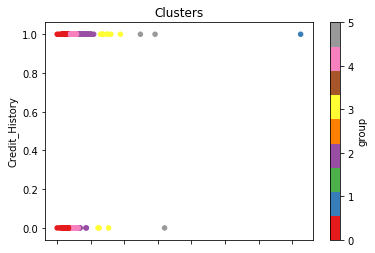

In [92]:
y_kmeans = pd.DataFrame(y_kmeans, columns=['group'])
x= pd.DataFrame(x, columns=['ApplicantIncome', 'Credit_History'])
x = pd.concat([x,y_kmeans], axis=1)
x.plot.scatter(x='ApplicantIncome', y='Credit_History', c='group', colormap="Set1")
plt.title('Clusters')

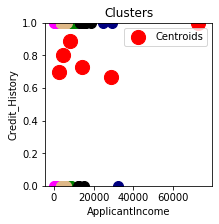

In [81]:
#Lets plot those clusters!
fig = plt.figure(figsize = (3,3))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='magenta')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='black')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='burlywood')
plt.scatter(x[y_kmeans==5,0],x[y_kmeans==5,1],s=100,c='navy')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Clusters')
plt.xlabel('ApplicantIncome')
plt.ylabel('Credit_History')
plt.legend()
plt.ylim(0,1)
plt.show()


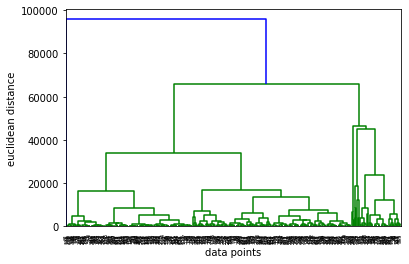

In [41]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
# %% dendrogram
merg = linkage(test,method="ward")
dendrogram(merg)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

### 18.Fit agglomerative hierarchical clustering



In [42]:
h_c = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster_hc = h_c.fit_predict(test)
cluster_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 19.Lets plot those clusters!



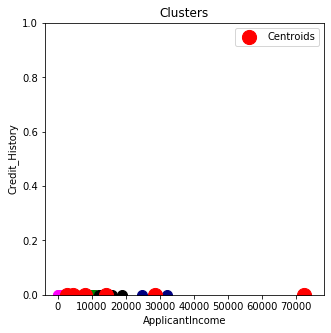

In [43]:
fig = plt.figure(figsize = (5,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='magenta')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='black')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='burlywood')
plt.scatter(x[y_kmeans==5,0],x[y_kmeans==5,1],s=100,c='navy')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Clusters')
plt.xlabel('ApplicantIncome')
plt.ylabel('Credit_History')
plt.legend()
plt.ylim(0,1)
plt.show()